# Attributions:

**Emily:** Part a

**Chris:** Looked over final solution

**Naveen:** Parts b, c

Loading BokehJS ...


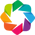

In [1]:
# Imports
import collections

import numpy as np
import numba
import pandas as pd
import scipy.stats as st

import pymc3 as pm
import theano.tensor as tt

import bebi103

import bokeh.io
import bokeh.plotting
from bokeh.models.ranges import Range1d

import holoviews as hv

bokeh.io.output_notebook()
hv.extension('bokeh')

# Part a
We start by using Pymc3 to sample out the binomial distribution model given our data about reversal for each strain.

In [2]:
# Specify parameters
p_min = 0
p_max = 1

# Wildtype
r_wildtype = 13
n_wildtype = 126

# Loop through data and plot for each case
with pm.Model() as binom_model:
    # Prior
    p = pm.Uniform('p', lower=p_min, upper=p_max)

    # Likelihood
    r_obs = pm.Binomial('r_obs', n=n_wildtype, p=p, observed=r_wildtype)
    
# Sampling
with binom_model:
    trace = pm.sample(init='advi+adapt_diag', draws=10000, tune=10000, njobs=1)

# Get trace of values of p for WT
df_wt = bebi103.pm.trace_to_dataframe(trace)
df_wt_p = df_wt['p']
    

# ASH 
r_ash = 39
n_ash = 124

# Loop through data and plot for each case
with pm.Model() as binom_model:
    # Prior
    p = pm.Uniform('p', lower=p_min, upper=p_max)

    # Likelihood
    r_obs = pm.Binomial('r_obs', n=n_ash, p=p, observed=r_ash)
    
# Sampling
with binom_model:
    trace = pm.sample(init='advi+adapt_diag', draws=10000, tune=10000, njobs=1)

# Get trace of values of p for ASH
df_ash = bebi103.pm.trace_to_dataframe(trace)
df_ash_p = df_ash['p']
    
# AVA
r_ava = 91
n_ava = 124

# Loop through data and plot for each case
with pm.Model() as binom_model:
    # Prior
    p = pm.Uniform('p', lower=p_min, upper=p_max)

    # Likelihood
    r_obs = pm.Binomial('r_obs', n=n_ava, p=p, observed=r_ava)
    
# Sampling
with binom_model:
    trace = pm.sample(init='advi+adapt_diag', draws=10000, tune=10000, njobs=1)

# Get trace of values of p for AVA
df_ava = bebi103.pm.trace_to_dataframe(trace)
df_ava_p = df_ava['p']

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...
INFO:pymc3:Initializing NUTS using advi+adapt_diag...
Average Loss = 5.7163:   4%|▎         | 7341/200000 [00:09<04:20, 739.85it/s]
Convergence archived at 7400
INFO:pymc3.variational.inference:Convergence archived at 7400
Interrupted at 7,399 [3%]: Average Loss = 20.771
INFO:pymc3.variational.inference:Interrupted at 7,399 [3%]: Average Loss = 20.771
100%|██████████| 20000/20000 [00:12<00:00, 1592.91it/s]
Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...
INFO:pymc3:Initializing NUTS using advi+adapt_diag...
Average Loss = 5.1546:   3%|▎         | 6749/200000 [00:08<04:06, 785.15it/s]
Convergence archived at 6800
INFO:pymc3.variational.inference:Convergence archived at 6800
Interrupted at 6,799 [3%]: Average Loss = 8.2543
INFO:pymc3.variational.inference:Interrupted at 6,799 [3%]: Average Loss = 8.2543
100%

Now that we have samples, we can plot the data. Let's start with ECDFs.

In [3]:
# ECDF Plotting

# WT
plots = [bebi103.viz.ecdf(df_wt_p,
                          formal=True,
                          plot_height=250,
                          plot_width=400,
                          x_axis_label='p',
                          y_axis_label='ECDF',
                          title='ECDF of Wildtype p Sampling (PyMC3)')]
# ASH
plots.append(bebi103.viz.ecdf(df_ash_p,
                          formal=True,
                          plot_height=250,
                          plot_width=400,
                          x_axis_label='p',
                          y_axis_label='ECDF',
                          title='ECDF of ASH p Sampling (PyMC3)'))
# AVA
plots.append(bebi103.viz.ecdf(df_ava_p,
                          formal=True,
                          plot_height=250,
                          plot_width=400,
                          x_axis_label='p',
                          y_axis_label='ECDF',
                          title='ECDF of AVA p Sampling (PyMC3)'))

# Rename plots for later use
plots_ecdf = plots

# Plotting
bokeh.io.show(bokeh.layouts.gridplot(plots, ncols=2))

For reference, the total number of reversals/total trials for each strain from the experimental data:
- WT p = 0.103
- ASH p = 0.315
- AVA p = 0.734

We can see from the ECDFs that Pymc3 did in fact sample the appropriate binomial distribution based on the values we gave - the medians on these graphs appear to be approximately equal to the input p values for each strain! Good job Pymc3. Let's double check that with histograms.

In [4]:
# WT histogram
plots = [bebi103.viz.histogram(df_wt_p,
                               bins=50,
                               plot_height=250,
                               plot_width=400,
                               line_width=2,
                               x_axis_label='p',
                               y_axis_label='counts',
                               title='Histogram of Wildtype p Sampling (PyMC3)')]
# ASH histogram
plots.append(bebi103.viz.histogram(df_ash_p,
                               bins=50,
                               plot_height=250,
                               plot_width=400,
                               line_width=2,
                               x_axis_label='p',
                               y_axis_label='counts',
                               title='Histogram of ASH p Sampling (PyMC3)'))
# AVA histogram
plots.append(bebi103.viz.histogram(df_ava_p,
                               bins=50,
                               plot_height=250,
                               plot_width=400,
                               line_width=2,
                               x_axis_label='p',
                               y_axis_label='counts',
                               title='Histogram of AVA p Sampling (PyMC3)'))

# Rename plots for later use
plots_hist = plots

bokeh.io.show(bokeh.layouts.gridplot(plots, ncols=2))

Once again, the histogram bins seem peaked/centered around the appropriate p values, consistent with our input. This is just another way to confirm the sampler did what it was supposed to.

<div class="alert alert-info">(12.5/16) Good job! It would be nice to actually see the expression for the posterior you're sampling out of / a brief description of why it's appropriate (-3) and a short biological discussion of the plot (-0.5) - e.g. does it make sense that WT has the lowest probability of reversal? [Also, if you want to make comparisons between the median and the values for $\frac{r}{n}$, it would help to put them on the same plot!] </div>

# Part b

Now, let's revive our entire MCMC sampler from 5.1. We'll break it down in parts for clarity.

First, we define a single-variable gaussian proposal sampler:

In [5]:
def gaussian_proposal_sample(x0, sigma):
    # Returns a new x value ((1, n) array) given a starting coordinate (x0, (1, n) array)
    # and a multivariate sigma ((n, n) array).
    return np.random.normal(x0, sigma)

Next, we make a function that calculates the log of a Gaussian distribution with center x0 at point x.

In [6]:
def log_gaussian_proposal(x, x0, sigma):
    # Returns the log of a Gaussian distribution at x ((1, n) array) centered at
    # x0 ((1, n) array) with a multivariate sigma ((n, n) array).
    return np.log(st.norm.pdf(x - x0))

After that, we define a function to do a step of MCMC. This is copied verbatim from 5.1(a).

In [7]:
def mh_step(x, log_post, logpost_current, sigma, args=()):
    """
    Parameters
    ----------
    x : ndarray, shape (n_variables,)
        The present location of the walker in parameter space.
    log_post : function
        The function to compute the log posterior. It has call
        signature `log_post(x, *args)`.
    log_post_current : float
        The current value of the log posterior.
    sigma : ndarray, shape (n_variables, )
        The standard deviations for the proposal distribution.
    args : tuple
        Additional arguments passed to `log_post()` function.

    Returns
    -------
    x_out : ndarray, shape (n_variables,)
        The position of the walker after the Metropolis-Hastings
        step. If no step is taken, returns the inputted `x`.
    log_post_updated : float
        The log posterior after the step.
    accepted : bool
        True is the proposal step was taken, False otherwise.
    """
    # Generate a new x location
    new_x = gaussian_proposal_sample(x, sigma)
    
    # Find values relevant for calculating r
    log_proposal_old = log_gaussian_proposal(x, new_x, sigma)
    log_proposal_new = log_gaussian_proposal(new_x, x, sigma)
    log_post_new = log_post(new_x, *args)

    # Calculate r
    r = np.exp(log_post_new + log_proposal_old - logpost_current - log_proposal_new)
    
    # Perform accept/reject procedure
    if r >= 1:
        return (new_x, log_post_new, True)
    else:
        if np.random.random() < r:
            return (new_x, log_post_new, True)
        else:
            return (x, logpost_current, False)

<div class="alert alert-info">Nice - just note that <tt>log_proposal_old</tt> is exactly equal to <tt>log_proposal_new</tt>, so you don't actually need to compute it! (Write out the expression to check.) </div>

Finally, we create a function to manage the MCMC. This is copied verbatim from 5.1(c) to take advantage of tuning.

In [8]:
def mh_sample(log_post, x0, sigma, args=(), n_burn=1000, n_steps=1000,
              variable_names=None, tune_interval = 100, verbose = False):
    """
    Parameters
    ----------
    log_post : function
        The function to compute the log posterior. It has call
        signature `log_post(x, *args)`.
    x0 : ndarray, shape (n_variables,)
        The starting location of a walker in parameter space.
    sigma : ndarray, shape (n_variables, )
        The standard deviations for the proposal distribution.
    args : tuple
        Additional arguments passed to `log_post()` function.
    n_burn : int, default 1000
        Number of burn-in steps.
    n_steps : int, default 1000
        Number of steps to take after burn-in.
    variable_names : list, length n_variables
        List of names of variables. If None, then variable names
        are sequential integers.
    tune_interval : number of steps to calculate acceptance rate
        for tuning, default 100.
    verbose : boolean, determines whether to print acceptance rate
    
    Returns
    -------
    output : DataFrame
        The first `n_variables` columns contain the samples.
        Additionally, column 'lnprob' has the log posterior value
        at each sample.
    """
    # Create tuning variables that are accessible to the tune function
    mh_sample.tune_counter = 0
    mh_sample.accepts = 0
    
    # Perform tuning every tune_interval steps and modify sigma accordingly.
    # When tuning occurs, the number of acceptances is reset.
    def tune(sigma):
        mh_sample.tune_counter = (mh_sample.tune_counter + 1) % tune_interval
        if mh_sample.tune_counter != 0:
            return sigma
        a = mh_sample.accepts/tune_interval # accept rate
        if verbose:
            print("Accept rate: %.2f%%" % (a*100))
        mh_sample.accepts = 0
        scale = 1
        if a < 0.001:
            scale = 0.1
        elif a < 0.05:
            scale = 0.5
        elif a < 0.2:
            scale = 0.9
        elif a > 0.95:
            scale = 10
        elif a > 0.75:
            scale = 2
        elif a > 0.5:
            scale = 1.1
        return sigma * scale
    
    # Below is unchanged, except for commented lines
    
    logpost_current = log_post(x0, *args)
    
    while n_burn > 0:
        step_result = mh_step(x0, log_post, logpost_current, sigma, args)
        if step_result[2]:
            x0 = step_result[0]
            logpost_current = step_result[1]
            n_burn = n_burn - 1
            mh_sample.accepts += 1 # Add line to track acceptance
        sigma = tune(sigma) # Add line to perform tuning
            
    print("Done with burn.\nRunning %s steps..."%(n_steps))
    
    samples = []
    log_posteriors = []
    
    while n_steps > 0:
        step_result = mh_step(x0, log_post, logpost_current, sigma, args)
        if step_result[2]:
            x0 = step_result[0]
            logpost_current = step_result[1]
            n_steps = n_steps - 1
            mh_sample.accepts += 1 # Add line to track acceptance
            samples.append(x0)
            log_posteriors.append(logpost_current)
        sigma = tune(sigma) # Add line to perform tuning
    
    results_df = pd.DataFrame(samples, columns = variable_names)
    results_df['lnprob'] = log_posteriors
    print("MCMC sampling finished.")
    return results_df

Now, let's make a function to calculate the unnormalized log posterior for the value of p in a binomial distribution given a uniform prior:

In [9]:
def log_post(p, r, n):
    # Calculate log posterior for p in binomial distribution
    return r * np.log(p) + (n - r) * np.log(1 - p)

Additionally, let's create a convenience function to do our plotting for us:

In [10]:
def compare_MCMC_to_PyMC3(typename, num_steps):
    # Data for each strain
    r_values = {"Wildtype": 13, "ASH": 39, "AVA": 91}
    n_values = {"Wildtype": 126, "ASH": 124, "AVA": 124}
    
    # Our previous plot setup
    pymc3_plotnum = {"Wildtype": 0, "ASH": 1, "AVA": 2}
    
    # Arbitrary sigma (taken care of by tuning)
    sigma = 0.05
    
    # Extract constants
    r = r_values[typename]
    n = n_values[typename]
    plotnum = pymc3_plotnum[typename]
    
    # Run sampling
    args = (r, n)
    MCMC_result = mh_sample(log_post,
                            r/n,
                            sigma,
                            args,
                            n_burn=100,
                            n_steps=num_steps,
                            variable_names=['p'],
                            verbose=False)
    
    # Create histogram of p
    plot_p = bebi103.viz.histogram(MCMC_result['p'],
                                   bins=50,
                                   plot_height=250,
                                   plot_width=400,
                                   line_width=2,
                                   x_axis_label='p',
                                   y_axis_label='counts',
                                   title='Histogram of ' + typename + ' p sampling (Metropolis MCMC)')
    
    plot_p.x_range = plots_hist[plotnum].x_range
    
    # Create ecdf of p
    plot_ecdf = bebi103.viz.ecdf(MCMC_result['p'],
                                 formal=True,
                                 plot_height=250,
                                 plot_width=400,
                                 x_axis_label='p',
                                 y_axis_label='ECDF',
                                 title='ECDF of ' + typename + ' p Sampling (Metropolis MCMC)')
    
    plot_ecdf.x_range = plots_ecdf[plotnum].x_range
    
    # Arrange plots nicely
    myplots = [plot_p, plot_ecdf, plots_hist[plotnum], plots_ecdf[plotnum]]
    bokeh.io.show(bokeh.layouts.gridplot(myplots, ncols=2))

Now, let's compare wildtype MCMC to wildtype PyMC3:

In [11]:
compare_MCMC_to_PyMC3("Wildtype", 5000)

Done with burn.
Running 5000 steps...
MCMC sampling finished.


Next, ASH:

In [12]:
compare_MCMC_to_PyMC3("ASH", 5000)

Done with burn.
Running 5000 steps...
MCMC sampling finished.


Next, AVA:

In [13]:
compare_MCMC_to_PyMC3("AVA", 5000)

Done with burn.
Running 5000 steps...
MCMC sampling finished.


<div class="alert alert-info">(11/10) Awesome! Nice comparison of Random walk metropolis-hastings and NUTS. That website is awesome! </div>

Are there any interesting conclusions we can draw from these results? It's clear that PyMC3 and our MCMC sampler give about the same location for the center of each distribution. However, it appears that our MCMC sampler gives slightly broader distributions for each. This could be due to slight differences in the nature of sampling, that allows PyMC3 to converge on a "true" distribution faster than our Metropolis-Hastings sampler. However, for very long simulations, both should converge to the same distribution. The "widening" effect for Metropolis-Hastings is very apparent on the website https://chi-feng.github.io/mcmc-demo/ when you compare Metropolis-Hastings to NUTS, for example.

## Part (c)

Now, we want to find the distribution of probability difference between two strains. We chose to compare the AVA and and ASH strains using our Metropolis-Hastings sampler.

In problem set 3.3, we were able to get $$g(\delta,\gamma|n_1,r_1,n_2,r_2)$$ which was difficult to marginalize by integration. However, we can just do MCMC on it and look at $\delta$ alone to get a distribution for $\delta$. Let us define the log of the posterior as defined in that problem set:

In [14]:
def log_post(x, r1, r2, n1, n2):
    # Calculate log posterior given parameter list x = [delta, gamma] and r_i, n_i
    d = x[0]
    g = x[1]
    gd_diff = (g - d)/2
    gd_sum = (g + d)/2
    if d > 1 or d < -1:
        return np.nan
    if g < abs(d) or g > 2 - abs(d):
        return np.nan
    return r1*np.log(gd_diff) + (n1-r1)*np.log(1-gd_diff) + r2*np.log(gd_sum) + (n2-r2)*np.log(1-gd_sum)

We are going back to multivariate, so let's bring back our multivariate proposal sampler from 5.1:

In [15]:
def gaussian_proposal_sample(x0, sigma):
    # Returns a new x value ((1, n) array) given a starting coordinate (x0, (1, n) array)
    # and a multivariate sigma ((n, n) array).
    return np.random.multivariate_normal(x0, sigma)

We also want to bring back our multivariate log proposal function from 5.1:

In [16]:
def log_gaussian_proposal(x, x0, sigma):
    # Returns the log of a Gaussian distribution at x ((1, n) array) centered at
    # x0 ((1, n) array) with a multivariate sigma ((n, n) array).
    inv_cov = np.linalg.inv(sigma)
    return -np.dot((x-x0), np.dot(inv_cov, (x-x0))) / 2

Now, we plot $\delta$. Note that we naively expect its distribution to be centered at $\frac{91}{124}-\frac{39}{124}\approx0.42$:

In [17]:
# ASH vs. AVA data
args_list = (39, 91, 124, 124)

# Set up arbitrary starting point and kernel sigma
x0 = np.array([0.5, 1])
kernel_sigma = np.array([[1,0],[0,1]])

# Run sampling
delta_result = mh_sample(log_post,
              x0,
              kernel_sigma,
              args=args_list,
              n_burn=1000,
              n_steps=10000,
              variable_names=['d', 'g'])

# Create histogram of delta
p = bebi103.viz.histogram(delta_result['d'],
                          bins=50,
                          plot_height=250,
                          plot_width=400,
                          line_width=2,
                          x_axis_label='delta',
                          y_axis_label='counts',
                          title='Histogram of delta sampling for ASH vs. AVA')
bokeh.io.show(p)

# Create ECDF plot of delta
p_e = bebi103.viz.ecdf(delta_result['d'],
                      formal=True,
                      plot_height=250,
                      plot_width=400,
                      x_axis_label='delta',
                      y_axis_label='ECDF',
                      title='ECDF of delta sampling for ASH vs. AVA')
bokeh.io.show(p_e)

Done with burn.
Running 10000 steps...
MCMC sampling finished.


It appears centered at the correct spot. This method of finding $\delta$ is convenient since there is circumvents a nasaty marginalization integral yet still gives a clear, meaningful result.

<div class="alert alert-info">(4/4) Nice! Note that, instead of doing change of variables on the posterior (which you did to get the function that you sample out of), you can just do the change of variables on the samples you generated in Part A or Part B. (Subtracting the two unsorted traces gives you many samples for $\delta$.) </div>